In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_biclusters

Text(0.5, 1.0, 'Biclusters')

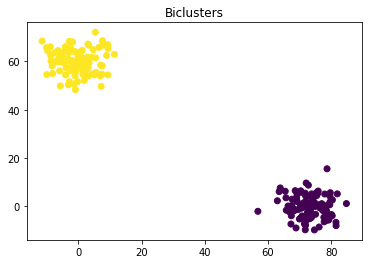

In [41]:
clusters = make_biclusters(shape=(200, 2), n_clusters=2, noise=5, random_state=0)
data = clusters[0]

plt.scatter(data[:, 0], data[:, 1], c=clusters[1][0])
plt.title("Biclusters")

In [42]:
# build 'neighbours' matrix with a cutoff
cutoff = 4.5
iterations = 150

neighbours_matrix = np.zeros((data.shape[0], data.shape[0]))
for d in range(data.shape[0]):
    for e in range(data.shape[0]):
        if d != e:
            dist = np.sum(np.abs(data[d] - data[e]))
            if dist < cutoff:
                neighbours_matrix[d, e] = 1
                neighbours_matrix[e, d] = 1
            else:
                neighbours_matrix[d, e] = 0
                neighbours_matrix[e, d] = 0

neighbours = {}

for d in range(data.shape[0]):
    neighbours[tuple(data[d])] = data[np.where(neighbours_matrix[d] > 0)]

Text(0.5, 1.0, 'Number of neighbours for each data point')

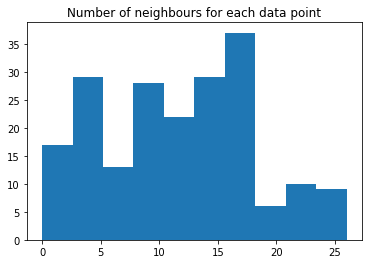

In [43]:
plt.hist([len(neighbours[tuple(data[d])]) for d in range(data.shape[0])])
plt.title("Number of neighbours for each data point")

Text(0.5, 1.0, 'Initial assignment')

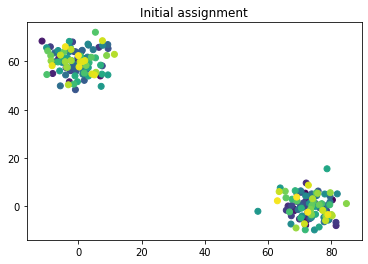

In [44]:
# run the algorithm

# assign random classes
classes = {}
for d in range(data.shape[0]):
    classes[tuple(data[d])] = d

assignments = [classes[tuple(p)] for p in data]
plt.scatter(data[:, 0], data[:, 1], c=assignments)
plt.title("Initial assignment")

In [45]:
# iterate propergation
for _ in range(iterations):
    for p in data:
        neighbours_classes = [classes[tuple(n)] for n in neighbours[tuple(p)]]
        if len(neighbours_classes) > 0:
            _, counts = np.unique(neighbours_classes, return_counts=True)
            if np.all(counts[0] == counts):
                classes[tuple(p)] = np.random.choice(neighbours_classes)
            else:
                classes[tuple(p)] = neighbours_classes[np.argmax(counts)]

Text(0.5, 1.0, 'Final assignment')

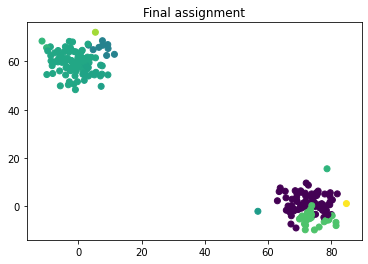

In [46]:
assignments = [classes[tuple(p)] for p in data]
plt.scatter(data[:, 0], data[:, 1], c=assignments)
plt.title("Final assignment")